/home/winter/onsager/amber
Snolog2


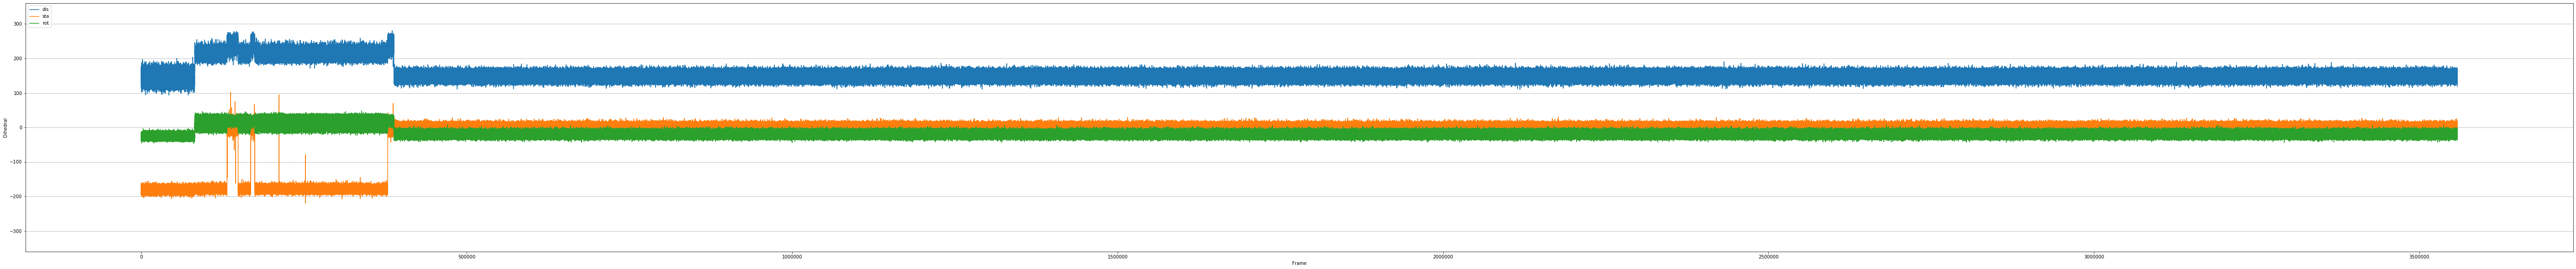

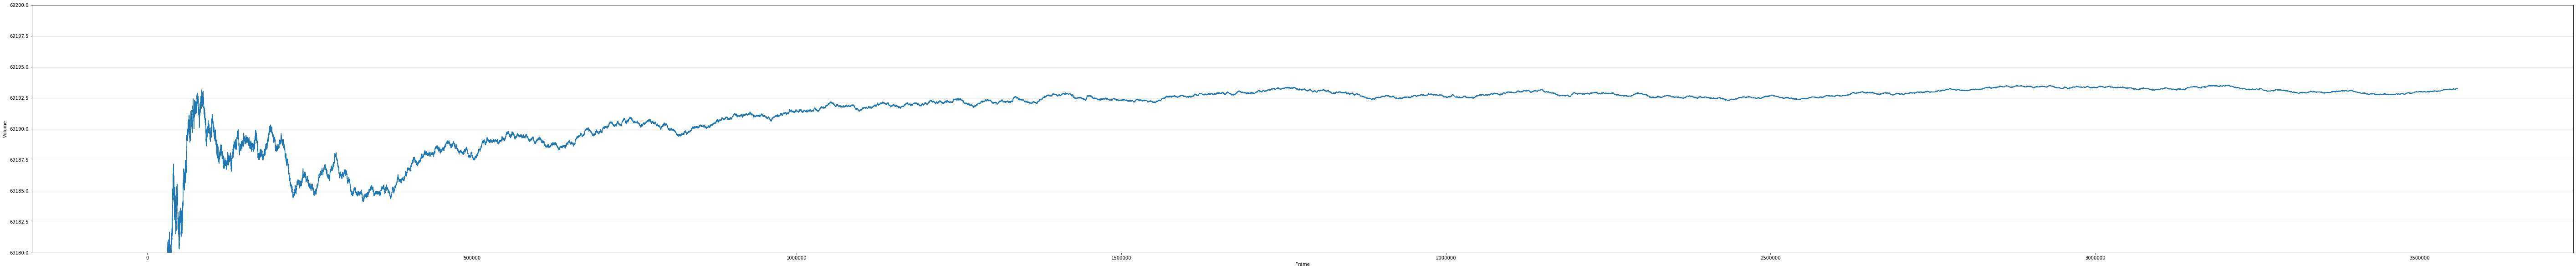

Snolog3


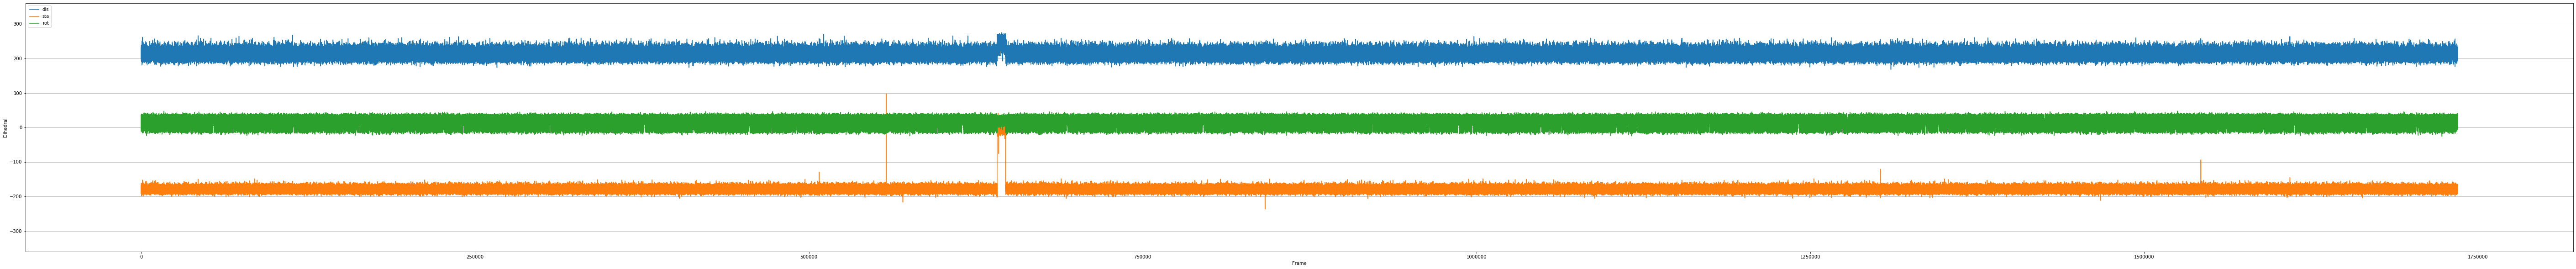

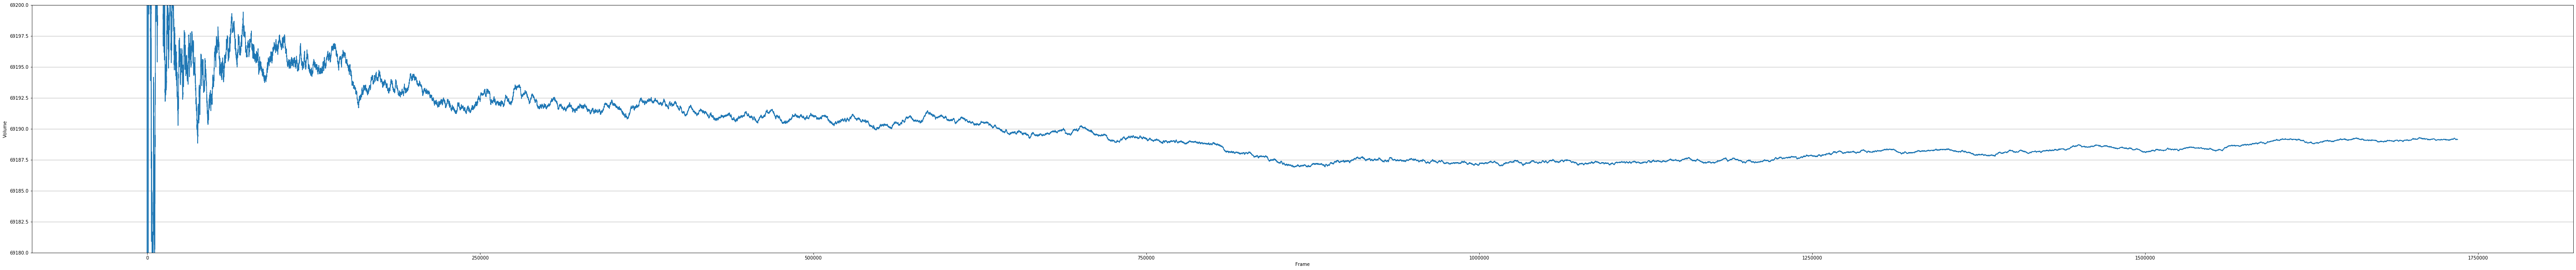

Snolog4


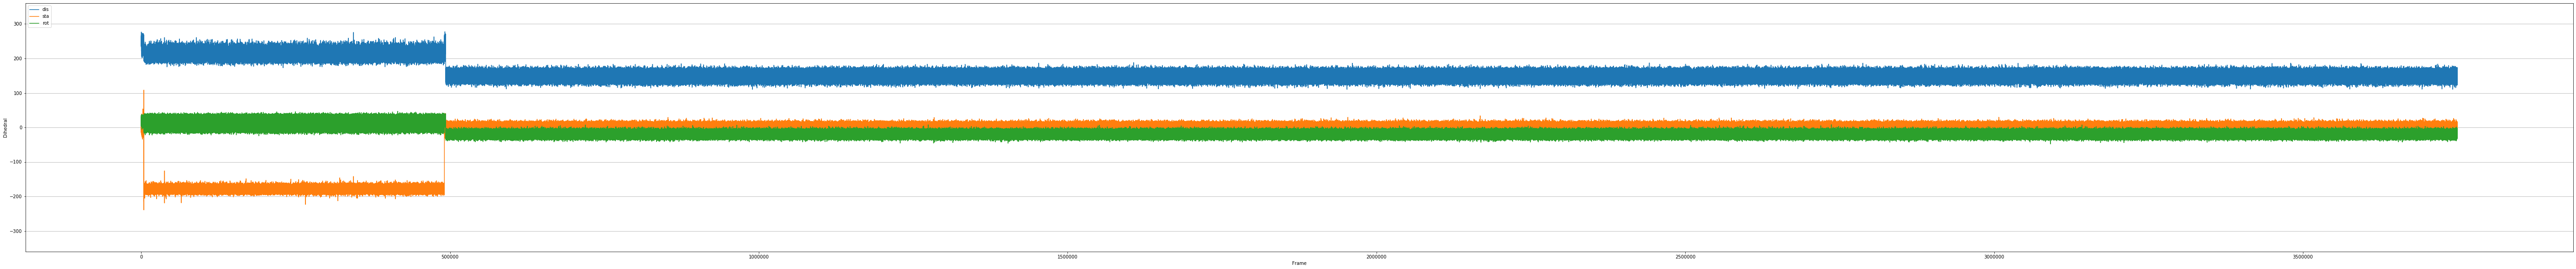

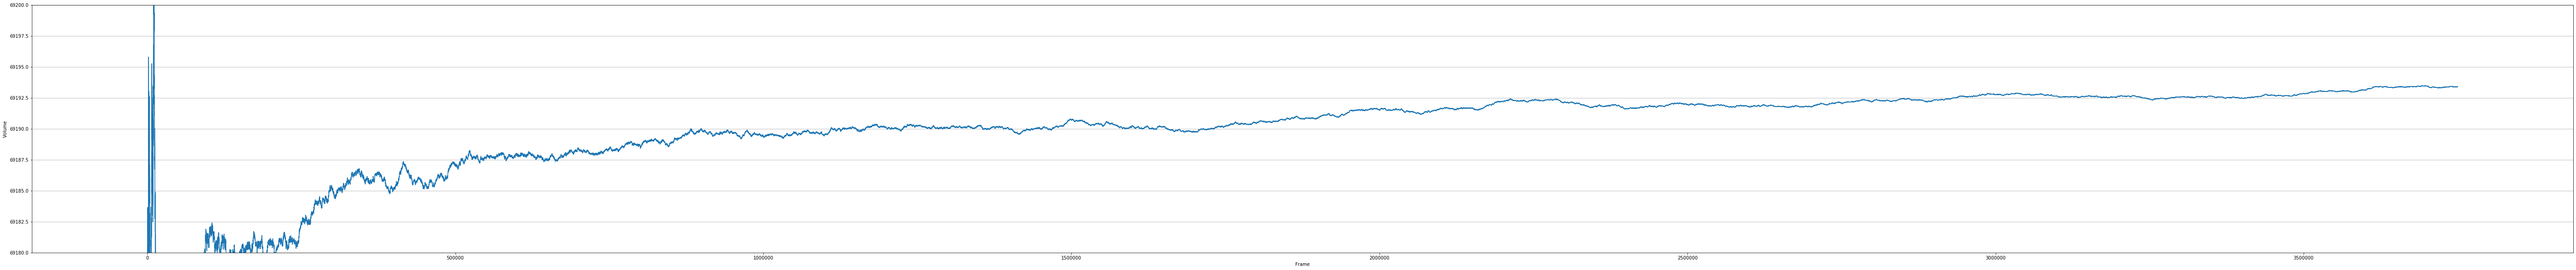

Snolog5


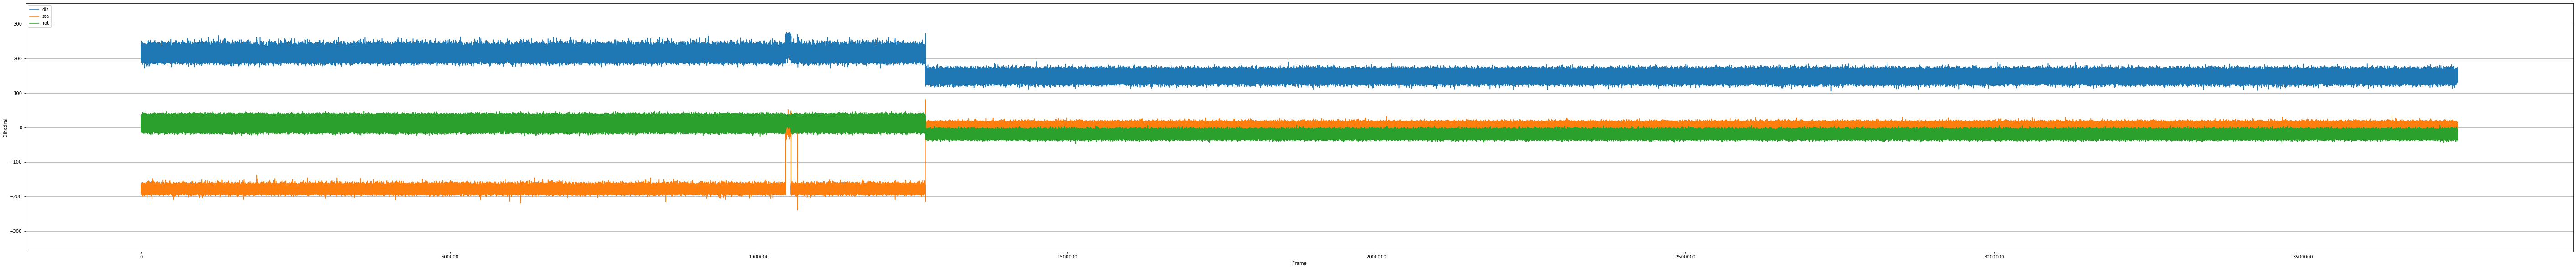

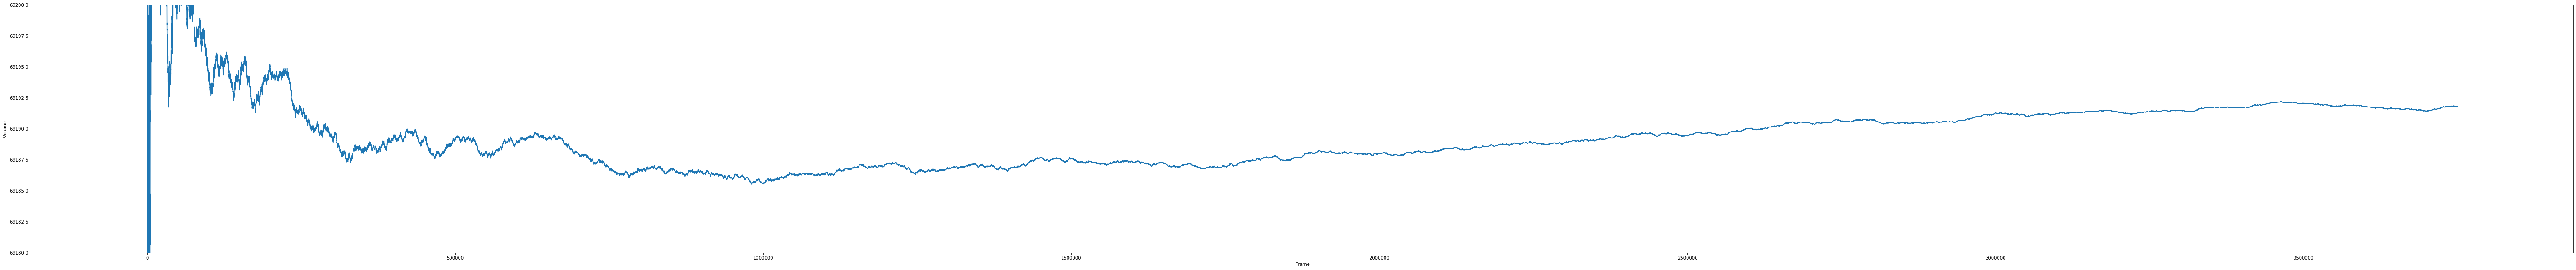

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# # this function is from http://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
# def smooth(x,window_len=31,window='flat'):

#     s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
#     #print(len(s))
#     if window == 'flat': #moving average
#         w=np.ones(window_len,'d')
#     else:
#         w=eval('numpy.'+window+'(window_len)')

#     y=np.convolve(w/w.sum(),s,mode='valid')
#     return y

def unwrap(raw):
    con = np.copy(raw)
    for i in range(1,raw.size): 
        diff=con[i]-con[i-1]
        if diff > 180:
            con[i:] -= 360
        elif diff < -180:
            con[i:] += 360
    return con

def myplot(name):
    rawdis = np.genfromtxt("/home/winter/onsager/amber/"+name+".dis", skip_header=1, skip_footer=0)
    sta = np.genfromtxt("/home/winter/onsager/amber/"+name+".sta", skip_header=1, skip_footer=0, usecols=0)
    rot = np.genfromtxt("/home/winter/onsager/amber/"+name+".rot", skip_header=1, skip_footer=0)
    dis = unwrap(rawdis)
    
    plt.rcParams['agg.path.chunksize'] = 10000
    plt.figure(figsize=(100,10))
    plt.plot(dis)
    plt.plot(sta-60)
    plt.plot(rot)
    plt.xlabel('Frame')
    plt.ylabel('Dihedral')
    plt.ylim(-360,360)
    plt.grid(True,axis='y')
    plt.legend(['dis', 'sta', 'rot'], loc='upper left')
    plt.show()

def volumeplot(number):
    raw = np.genfromtxt("/home/winter/onsager/amber/volume"+number+".dat",skip_footer=0)
    
    window_width = 100000
    cumsum_vec = np.cumsum(np.insert(raw, 0, 0)) 
    volume = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    
    runningavg = np.cumsum(raw) / np.arange(1,len(raw)+1)
    
    plt.rcParams['agg.path.chunksize'] = 10000
    plt.figure(figsize=(100,10))
    plt.plot(runningavg)
    plt.xlabel('Frame')
    plt.ylabel('Volume')
    plt.ylim(69180,69200)
    plt.grid(True,axis='y')
    plt.show()
    
%cd /home/winter/onsager/amber
#for i in np.arange(1,21):
for i in np.arange(2,6):
    name = "Snolog"+str(i)
    print(name)
    myplot(name)
    mdoutfile = name + '_prod.out'
    # Open terminal and run commands like `grep VOLUME Snolog1_prod.out | awk '{print $9}' > volume1.dat` for each i.
    volumeplot(str(i))
